In [1]:
import numpy as np
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
data = pd.read_csv('P:/Dr.vinod/datasets/Life Expectancy Data.csv')

# Context
Although there have been lot of studies undertaken in the past on factors affecting life expectancy considering demographic variables, income composition and mortality rates. It was found that affect of immunization and human development index was not taken into account in the past. Also, some of the past research was done considering multiple linear regression based on data set of one year for all the countries. Hence, this gives motivation to resolve both the factors stated previously by formulating a regression model based on mixed effects model and multiple linear regression while considering data from a period of 2000 to 2015 for all the countries. Important immunization like Hepatitis B, Polio and Diphtheria will also be considered. In a nutshell, this study will focus on immunization factors, mortality factors, economic factors, social factors and other health related factors as well. Since the observations this dataset are based on different countries, it will be easier for a country to determine the predicting factor which is contributing to lower value of life expectancy. This will help in suggesting a country which area should be given importance in order to efficiently improve the life expectancy of its population.

# Content
The project relies on accuracy of data. The Global Health Observatory (GHO) data repository under World Health Organization (WHO) keeps track of the health status as well as many other related factors for all countries The data-sets are made available to public for the purpose of health data analysis. The data-set related to life expectancy, health factors for 193 countries has been collected from the same WHO data repository website and its corresponding economic data was collected from United Nation website. Among all categories of health-related factors only those critical factors were chosen which are more representative. It has been observed that in the past 15 years , there has been a huge development in health sector resulting in improvement of human mortality rates especially in the developing nations in comparison to the past 30 years. Therefore, in this project we have considered data from year 2000-2015 for 193 countries for further analysis. The individual data files have been merged together into a single data-set. On initial visual inspection of the data showed some missing values. As the data-sets were from WHO, we found no evident errors. Missing data was handled in R software by using Missmap command. The result indicated that most of the missing data was for population, Hepatitis B and GDP. The missing data were from less known countries like Vanuatu, Tonga, Togo, Cabo Verde etc. Finding all data for these countries was difficult and hence, it was decided that we exclude these countries from the final model data-set. The final merged file(final dataset) consists of 22 Columns and 2938 rows which meant 20 predicting variables. All predicting variables was then divided into several broad categories:​Immunization related factors, Mortality factors, Economical factors and Social factors.

In [4]:
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


 # Inspiration
The data-set aims to answer the following key questions:

Does various predicting factors which has been chosen initially really affect the Life expectancy? What are the predicting variables actually affecting the life expectancy?
Should a country having a lower life expectancy value(<65) increase its healthcare expenditure in order to improve its average lifespan?
How does Infant and Adult mortality rates affect life expectancy?
Does Life Expectancy has positive or negative correlation with eating habits, lifestyle, exercise, smoking, drinking alcohol etc.
What is the impact of schooling on the lifespan of humans?
Does Life Expectancy have positive or negative relationship with drinking alcohol?
Do densely populated countries tend to have lower life expectancy?
What is the impact of Immunization coverage on life Expectancy?

In [5]:
data.sample(n=5)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2057,Portugal,2013,Developed,86.0,79.0,0,10.00,2698.018170,98.0,1,...,98.0,9.55,98.0,0.1,21618.735340,1457295.0,0.7,0.5,0.827,16.3
2493,Swaziland,2011,Developing,55.0,438.0,2,5.20,735.709098,91.0,0,...,85.0,8.61,91.0,15.7,3934.273250,1225258.0,5.1,5.2,0.526,11.2
2595,The former Yugoslav republic of Macedonia,2005,Developing,73.6,12.0,0,1.75,0.000000,53.0,5,...,98.0,7.95,97.0,0.1,NaN,NaN,2.5,2.6,0.000,11.9
475,Cambodia,2004,Developing,61.5,253.0,19,1.38,8.386119,NaN,352,...,86.0,6.43,85.0,1.7,48.615184,1363377.0,11.6,11.7,0.458,9.7
2178,Saint Lucia,2005,Developing,73.1,16.0,0,12.32,0.000000,95.0,0,...,95.0,6.25,95.0,0.2,NaN,NaN,4.4,4.4,0.689,12.2


In [6]:
data.shape

(2938, 22)

In [7]:
data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [8]:
numerical=data.select_dtypes(include=np.number)
print(len(numerical.columns))
numerical.columns

20


Index(['Year', 'Life expectancy ', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
data.rename(columns={" BMI ":"BMI","Life expectancy ":"Life_Expectancy","Adult Mortality":"Adult_Mortality",
                   "infant deaths":"Infant_Deaths","percentage expenditure":"Percentage_Exp","Hepatitis B":"HepatitisB",
                  "Measles ":"Measles"," BMI ":"BMI","under-five deaths ":"Under_Five_Deaths","Diphtheria ":"Diphtheria",
                  " HIV/AIDS":"HIV/AIDS"," thinness  1-19 years":"thinness_1to19_years"," thinness 5-9 years":"thinness_5to9_years","Income composition of resources":"Income_Comp_Of_Resources",
                   "Total expenditure":"Tot_Exp"},inplace=True)

In [11]:
data.Life_Expectancy.value_counts()

73.0    45
75.0    33
78.0    31
73.6    28
81.0    25
        ..
41.5     1
83.3     1
49.5     1
39.0     1
55.2     1
Name: Life_Expectancy, Length: 362, dtype: int64

In [12]:
plt.style.use('ggplot')
plt.figure(figsize=(20,25))

<Figure size 1440x1800 with 0 Axes>

<Figure size 1440x1800 with 0 Axes>

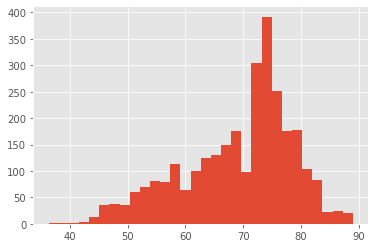

In [13]:
plt.hist(data.Life_Expectancy,bins='auto')
plt.show()

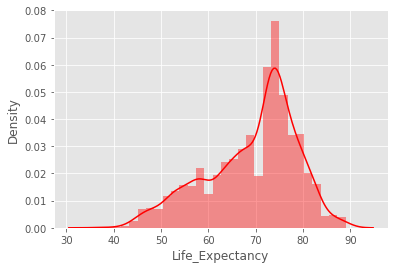

In [14]:
sns.distplot(data.Life_Expectancy,color='red')
plt.show()

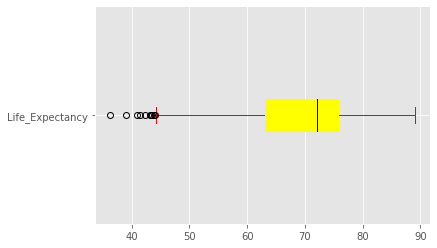

In [15]:
props=dict(boxes='yellow',whiskers='green',medians='black',caps='red')
data.Life_Expectancy.plot.box(patch_artist=True,vert=False,color=props)
plt.show()

In [16]:
iqr=data.Life_Expectancy.describe()['75%']-data.Life_Expectancy.describe()['25%']
ll=data.Life_Expectancy.describe()['25%']-1.5*iqr
ll

44.2

In [17]:
len(data.Life_Expectancy[data.Life_Expectancy>44.2])

2918

In [18]:
data=data[data['Life_Expectancy']>=44.2]

In [19]:
data.shape

(2918, 22)

In [20]:
data['Life_Expectancy']=data["Life_Expectancy"].fillna(data['Life_Expectancy'].median())

In [21]:
data.Year.value_counts()

2006    183
2008    183
2012    183
2014    183
2007    183
2009    183
2011    183
2013    183
2015    183
2002    182
2004    182
2010    182
2003    182
2005    182
2001    181
2000    180
Name: Year, dtype: int64

(array([361., 182., 364., 182., 366., 183., 365., 183., 366., 366.]),
 array([2000. , 2001.5, 2003. , 2004.5, 2006. , 2007.5, 2009. , 2010.5,
        2012. , 2013.5, 2015. ]),
 <BarContainer object of 10 artists>)

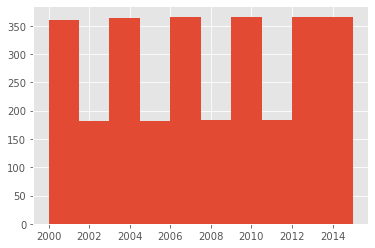

In [22]:
plt.hist(data.Year)

<AxesSubplot:xlabel='Year', ylabel='Life_Expectancy'>

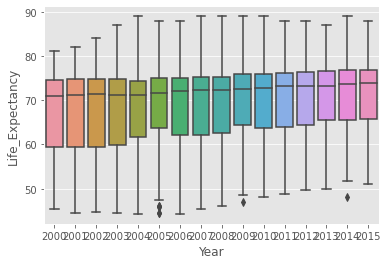

In [23]:
sns.boxplot(x="Year",y="Life_Expectancy",data=data)

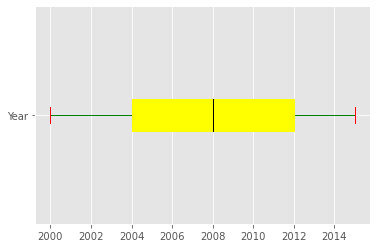

In [24]:
props=dict(boxes='yellow',whiskers='green',medians='black',caps='red')
data.Year.plot.box(patch_artist=True,vert=False,color=props)
plt.show()

<AxesSubplot:xlabel='Year', ylabel='Life_Expectancy'>

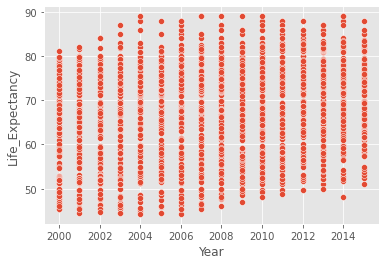

In [25]:
sns.scatterplot(x = "Year",y = "Life_Expectancy",data = data)

In [26]:
data.Status.value_counts()

Developing    2406
Developed      512
Name: Status, dtype: int64

<AxesSubplot:xlabel='Status', ylabel='count'>

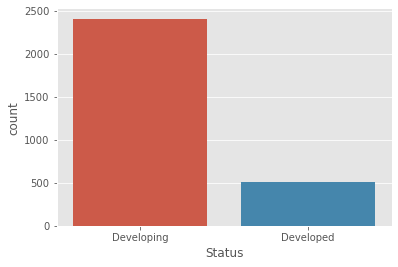

In [27]:
sns.countplot(data.Status)

In [28]:
data.Adult_Mortality.value_counts()

12.0     34
14.0     30
16.0     29
138.0    25
11.0     25
         ..
427.0     1
715.0     1
358.0     1
723.0     1
463.0     1
Name: Adult_Mortality, Length: 419, dtype: int64

(array([726., 765., 610., 423., 176., 117.,  53.,  22.,  14.,  12.]),
 array([  1. ,  73.2, 145.4, 217.6, 289.8, 362. , 434.2, 506.4, 578.6,
        650.8, 723. ]),
 <BarContainer object of 10 artists>)

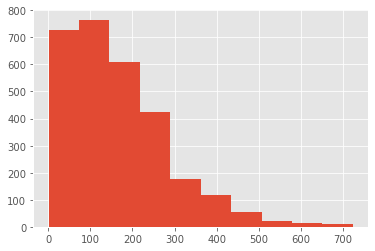

In [29]:
plt.hist(data.Adult_Mortality)

<AxesSubplot:xlabel='Adult_Mortality', ylabel='Density'>

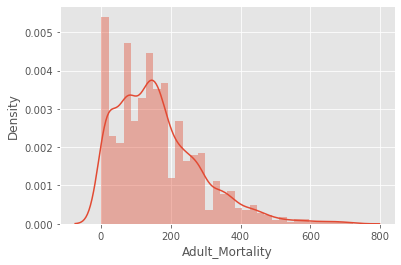

In [30]:
sns.distplot(data.Adult_Mortality)

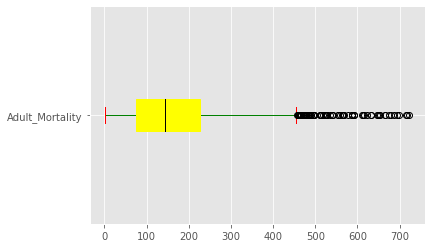

In [31]:
props=dict(boxes='yellow',whiskers='green',medians='black',caps='red')
data.Adult_Mortality.plot.box(patch_artist=True,vert=False,color=props)
plt.show()

In [32]:
IQR = data.Adult_Mortality.quantile(0.75)-data.Adult_Mortality.quantile(0.25)
IQR

153.0

In [33]:
upper_limit= data.Adult_Mortality.quantile(0.75)+ (1.5*IQR)
upper_limit

456.5

In [34]:
ul_len = len(data.Adult_Mortality[data.Adult_Mortality>upper_limit])

In [35]:
ul_percentage =ul_len/len(data)

In [36]:
ul_percentage

0.027073337902673064

In [37]:
data=data[data['Adult_Mortality']<=456]

In [38]:
data.shape

(2839, 22)

In [39]:
data['Adult_Mortality']=data["Adult_Mortality"].fillna(data["Adult_Mortality"].median())

In [40]:
data.Infant_Deaths.value_counts()

0      838
1      342
2      195
3      167
4       89
      ... 
144      1
150      1
156      1
162      1
957      1
Name: Infant_Deaths, Length: 206, dtype: int64

(array([2746.,   42.,   27.,    8.,    0.,    3.,    3.,    3.,    3.,
           4.]),
 array([   0.,  180.,  360.,  540.,  720.,  900., 1080., 1260., 1440.,
        1620., 1800.]),
 <BarContainer object of 10 artists>)

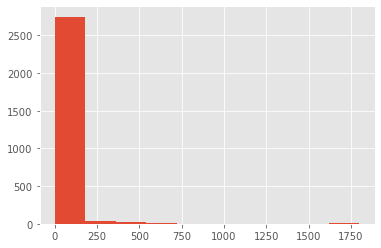

In [41]:
plt.hist(data.Infant_Deaths)

<AxesSubplot:xlabel='Infant_Deaths', ylabel='Density'>

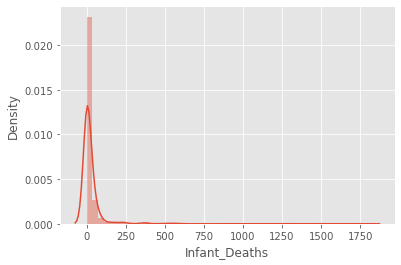

In [42]:
sns.distplot(data.Infant_Deaths)

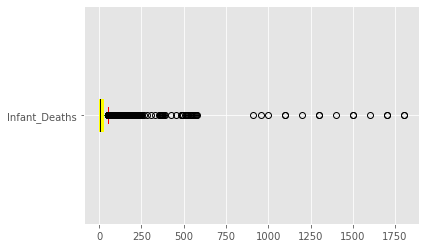

In [43]:
props=dict(boxes='yellow',whiskers='green',medians='black',caps='red')
data.Infant_Deaths.plot.box(patch_artist=True,vert=False,color=props)
plt.show()

In [44]:
IQR = data.Infant_Deaths.quantile(0.75)-data.Infant_Deaths.quantile(0.25)
IQR

20.0

In [45]:
upper_limit= data.Infant_Deaths.quantile(0.75)+ (1.5*IQR)
upper_limit

50.0

In [46]:
ul_len = len(data.Infant_Deaths[data.Infant_Deaths>upper_limit])

In [47]:
ul_percentage =ul_len/len(data)

In [48]:
ul_percentage

0.1229306093694963

In [49]:
data=data[data['Infant_Deaths']<=50]

In [50]:
data.shape

(2490, 22)

In [51]:
data.Alcohol.value_counts()

0.01     218
0.09      10
0.56       9
0.03       9
0.04       8
        ... 
15.52      1
7.96       1
11.75      1
5.86       1
2.29       1
Name: Alcohol, Length: 1029, dtype: int64

(array([755., 297., 270., 255., 240., 220., 198.,  66.,  10.,   5.]),
 array([1.0000e-02, 1.7960e+00, 3.5820e+00, 5.3680e+00, 7.1540e+00,
        8.9400e+00, 1.0726e+01, 1.2512e+01, 1.4298e+01, 1.6084e+01,
        1.7870e+01]),
 <BarContainer object of 10 artists>)

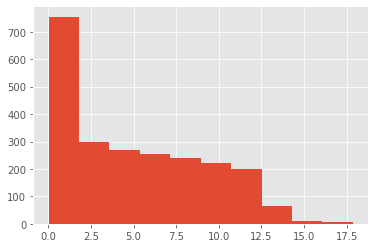

In [52]:
plt.hist(data.Alcohol)

<AxesSubplot:xlabel='Alcohol', ylabel='Density'>

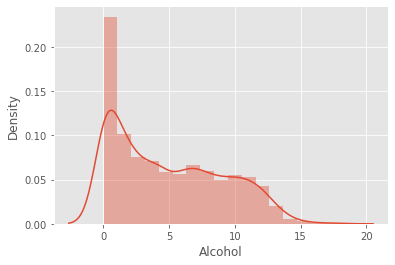

In [53]:
sns.distplot(data.Alcohol)

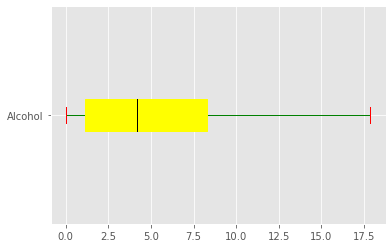

In [54]:
props=dict(boxes='yellow',whiskers='green',medians='black',caps='red')
data.Alcohol.plot.box(patch_artist=True,vert=False,color=props)
plt.show()

In [55]:
data['Alcohol']=data["Alcohol"].fillna(data["Alcohol"].median())

(array([2.209e+03, 1.180e+02, 5.400e+01, 4.600e+01, 2.700e+01, 1.700e+01,
        7.000e+00, 5.000e+00, 2.000e+00, 5.000e+00]),
 array([    0.      ,  1947.991161,  3895.982322,  5843.973483,
         7791.964644,  9739.955805, 11687.946966, 13635.938127,
        15583.929288, 17531.920449, 19479.91161 ]),
 <BarContainer object of 10 artists>)

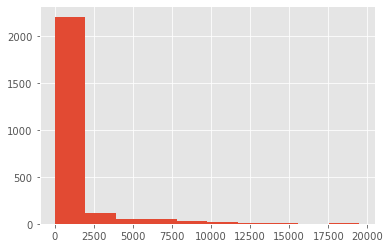

In [56]:
plt.hist(data.Percentage_Exp)

<AxesSubplot:xlabel='Percentage_Exp', ylabel='Density'>

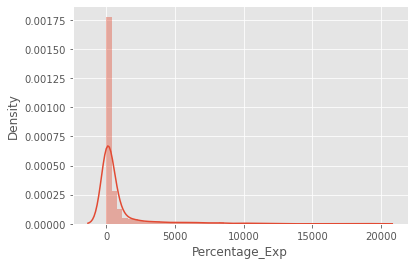

In [57]:
sns.distplot(data.Percentage_Exp)

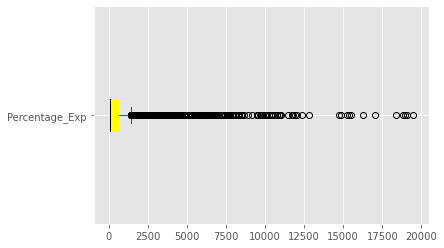

In [58]:
props=dict(boxes='yellow',whiskers='green',medians='black',caps='red')
data.Percentage_Exp.plot.box(patch_artist=True,vert=False,color=props)
plt.show()

In [59]:
IQR = data.Percentage_Exp.quantile(0.75)-data.Percentage_Exp.quantile(0.25)
IQR

555.701261055

In [60]:
ul=data.Percentage_Exp.quantile(0.75)+1.5*IQR

In [61]:
ul

1395.8012462325

In [62]:
ul_len = len(data.Percentage_Exp[data.Percentage_Exp>ul])

In [63]:
ul_percentage =ul_len/len(data)

In [64]:
ul_percentage

0.13694779116465863

In [65]:
data =data[data['Percentage_Exp']<=ul]

In [66]:
data.shape

(2149, 22)

In [67]:
data.HepatitisB.value_counts()

99.0    204
98.0    184
96.0    135
97.0    118
95.0    116
       ... 
38.0      1
12.0      1
19.0      1
15.0      1
33.0      1
Name: HepatitisB, Length: 83, dtype: int64

(array([ 107.,   11.,   13.,   11.,   33.,   40.,   89.,  116.,  310.,
        1066.]),
 array([ 2. , 11.7, 21.4, 31.1, 40.8, 50.5, 60.2, 69.9, 79.6, 89.3, 99. ]),
 <BarContainer object of 10 artists>)

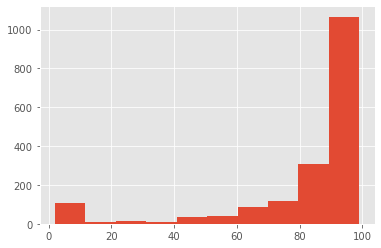

In [68]:
plt.hist(data.HepatitisB)

<AxesSubplot:xlabel='HepatitisB', ylabel='Density'>

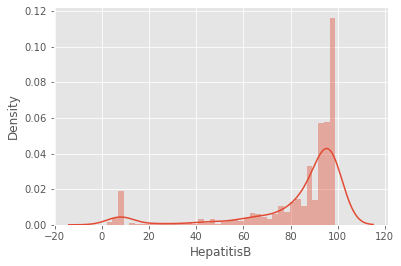

In [69]:
sns.distplot(data.HepatitisB)

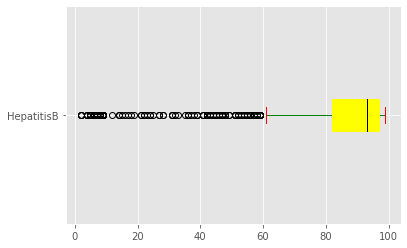

In [70]:
props=dict(boxes='yellow',whiskers='green',medians='black',caps='red')
data.HepatitisB.plot.box(patch_artist=True,vert=False,color=props)
plt.show()

In [71]:
data.drop('HepatitisB',axis=1,inplace=True)

In [72]:
data.Measles.value_counts()

0       852
1        77
2        51
3        34
4        22
       ... 
1010      1
992       1
7135      1
982       1
4088      1
Name: Measles, Length: 608, dtype: int64

(array([2.068e+03, 4.600e+01, 2.000e+01, 5.000e+00, 4.000e+00, 3.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00]),
 array([    0. ,  6223.3, 12446.6, 18669.9, 24893.2, 31116.5, 37339.8,
        43563.1, 49786.4, 56009.7, 62233. ]),
 <BarContainer object of 10 artists>)

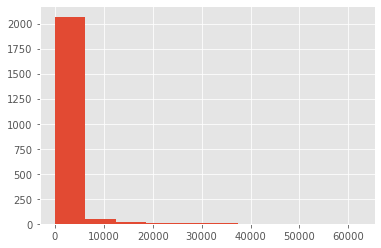

In [73]:
plt.hist(data.Measles)

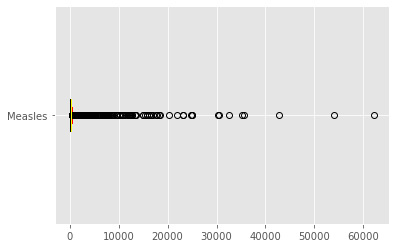

In [74]:
props=dict(boxes='yellow',whiskers='green',medians='black',caps='red')
data.Measles.plot.box(patch_artist=True,vert=False,color=props)
plt.show()

In [75]:
IQR = data.Measles.quantile(0.75)-data.Measles.quantile(0.25)
IQR

153.0

In [76]:
ul=data.Measles.quantile(0.75)+1.5*IQR

In [77]:
ul_len = len(data.Measles[data.Measles>ul])

In [78]:
ul_percentage =ul_len/len(data)

In [79]:
ul_percentage

0.1814797580269893

In [80]:
data.drop('Measles',axis=1,inplace=True)

In [81]:
data.shape

(2149, 20)

In [82]:
data.BMI.value_counts()

58.5    14
59.9    13
57.2    11
49.9    11
54.2    11
        ..
1.9      1
67.8     1
33.8     1
34.9     1
74.8     1
Name: BMI, Length: 581, dtype: int64

(array([211., 119., 263., 171., 144., 229., 364., 437., 166.,  29.]),
 array([ 1.  ,  8.66, 16.32, 23.98, 31.64, 39.3 , 46.96, 54.62, 62.28,
        69.94, 77.6 ]),
 <BarContainer object of 10 artists>)

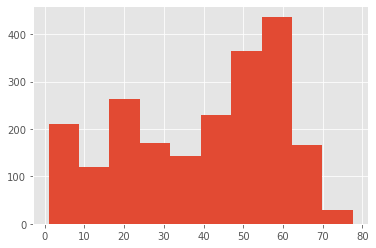

In [83]:
plt.hist(data.BMI)

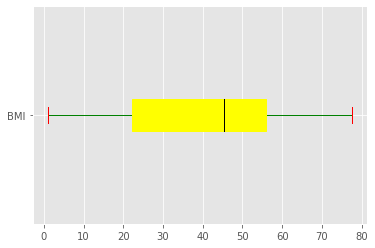

In [84]:
props=dict(boxes='yellow',whiskers='green',medians='black',caps='red')
data.BMI.plot.box(patch_artist=True,vert=False,color=props)
plt.show()

In [85]:
data['BMI']=data["BMI"].fillna(data["BMI"].median())

In [86]:
data.groupby('BMI')['Life_Expectancy'].describe()

,count,mean,std,min,25%,50%,75%,max
BMI,,,,,,,,
1.0,1.0,73.800000,NaN,73.8,73.800,73.80,73.800,73.8
1.4,1.0,74.000000,NaN,74.0,74.000,74.00,74.000,74.0
1.9,1.0,74.200000,NaN,74.2,74.200,74.20,74.200,74.2
2.0,1.0,65.100000,NaN,65.1,65.100,65.10,65.100,65.1
2.1,6.0,60.583333,5.370071,53.9,56.425,61.15,65.125,66.0
...,...,...,...,...,...,...,...,...
75.7,1.0,65.500000,NaN,65.5,65.500,65.50,65.500,65.5
76.2,1.0,65.700000,NaN,65.7,65.700,65.70,65.700,65.7
76.7,1.0,65.800000,NaN,65.8,65.800,65.80,65.800,65.8


In [87]:
data.Under_Five_Deaths.value_counts()

0     575
1     295
2     131
4     129
3     113
     ... 
83      1
87      1
64      1
91      1
95      1
Name: Under_Five_Deaths, Length: 89, dtype: int64

(array([1434.,  240.,  148.,   83.,  115.,   44.,   37.,   12.,   23.,
          13.]),
 array([ 0. ,  9.5, 19. , 28.5, 38. , 47.5, 57. , 66.5, 76. , 85.5, 95. ]),
 <BarContainer object of 10 artists>)

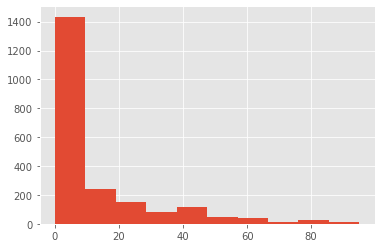

In [88]:
plt.hist(data.Under_Five_Deaths)

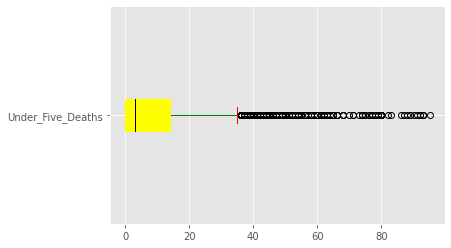

In [89]:
props=dict(boxes='yellow',whiskers='green',medians='black',caps='red')
data.Under_Five_Deaths.plot.box(patch_artist=True,vert=False,color=props)
plt.show()

In [90]:
IQR = data.Under_Five_Deaths.quantile(0.75)-data.Under_Five_Deaths.quantile(0.25)
IQR

14.0

In [91]:
ul=data.Under_Five_Deaths.quantile(0.75)+1.5*IQR

In [92]:
ul

35.0

In [93]:
ul_len = len(data.Under_Five_Deaths[data.Under_Five_Deaths>ul])

In [94]:
ul_percentage =ul_len/len(data)

In [95]:
ul_percentage

0.1237785016286645

In [96]:
data =data[data['Under_Five_Deaths']<=ul]

In [97]:
data.shape

(1883, 20)

In [98]:
data.Polio.value_counts()

99.0    298
98.0    201
97.0    150
95.0    133
96.0    132
       ... 
32.0      1
53.0      1
43.0      1
23.0      1
31.0      1
Name: Polio, Length: 69, dtype: int64

(array([8.300e+01, 1.000e+00, 4.000e+00, 6.000e+00, 3.100e+01, 4.300e+01,
        6.700e+01, 1.090e+02, 2.820e+02, 1.249e+03]),
 array([ 3. , 12.6, 22.2, 31.8, 41.4, 51. , 60.6, 70.2, 79.8, 89.4, 99. ]),
 <BarContainer object of 10 artists>)

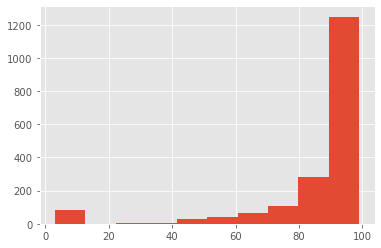

In [99]:
plt.hist(data.Polio)

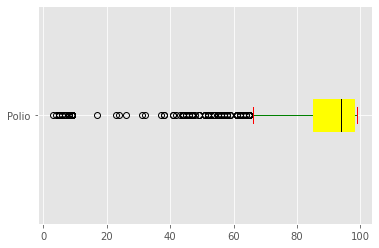

In [100]:
props=dict(boxes='yellow',whiskers='green',medians='black',caps='red')
data.Polio.plot.box(patch_artist=True,vert=False,color=props)
plt.show()

In [101]:
IQR = data.Polio.quantile(0.75)-data.Polio.quantile(0.25)
IQR

13.0

In [102]:
ll=data.Polio.quantile(0.25)-1.5*IQR
ll

65.5

In [103]:
ll_len = len(data.Polio[data.Polio>ll])

In [104]:
ll_percentage =ll_len/len(data)

In [105]:
ll_percentage

0.8916622411046203

In [106]:
data['Polio']=data["Polio"].fillna(data["Polio"].median())

In [107]:
data.Tot_Exp.value_counts()

4.60     13
6.70     11
6.10      8
5.25      8
6.88      8
         ..
3.97      1
5.72      1
6.29      1
11.97     1
9.84      1
Name: Tot_Exp, Length: 705, dtype: int64

(array([ 84., 226., 442., 529., 285.,  99.,  32.,  12.,   7.,   7.]),
 array([ 0.37 ,  2.093,  3.816,  5.539,  7.262,  8.985, 10.708, 12.431,
        14.154, 15.877, 17.6  ]),
 <BarContainer object of 10 artists>)

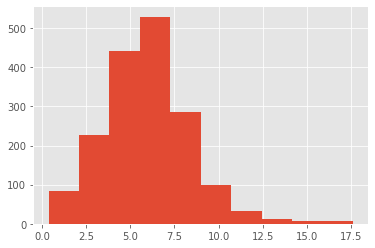

In [108]:
plt.hist(data.Tot_Exp)

<AxesSubplot:xlabel='Tot_Exp', ylabel='Density'>

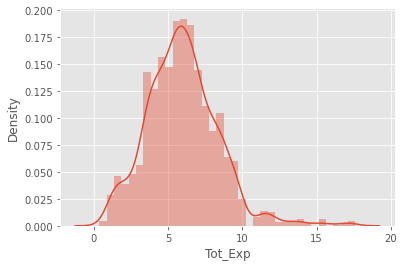

In [109]:
sns.distplot(data.Tot_Exp)

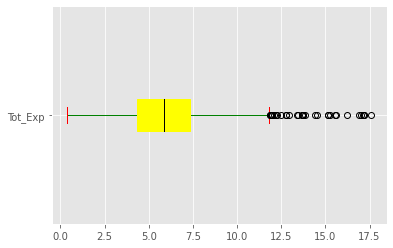

In [110]:
props=dict(boxes='yellow',whiskers='green',medians='black',caps='red')
data.Tot_Exp.plot.box(patch_artist=True,vert=False,color=props)
plt.show()

In [111]:
iqr=data.Tot_Exp.describe()['75%']-data.Tot_Exp.describe()['25%']
iqr

2.995

In [112]:
ul=data.Tot_Exp.describe()['75%']+1.5*iqr
print(ul)

11.8325


In [113]:
ul_len = len(data.Tot_Exp[data.Tot_Exp>ul])
ul_len

35

In [114]:
ll_percentage =ul_len/len(data)

In [115]:
ll_percentage

0.01858736059479554

In [116]:
data['Tot_Exp']=data["Tot_Exp"].fillna(data["Tot_Exp"].median())

In [117]:
data.Diphtheria.value_counts()

99.0    268
98.0    192
95.0    155
97.0    150
96.0    140
       ... 
36.0      1
3.0       1
2.0       1
56.0      1
26.0      1
Name: Diphtheria, Length: 72, dtype: int64

(array([8.800e+01, 1.000e+00, 6.000e+00, 1.100e+01, 3.600e+01, 2.500e+01,
        5.900e+01, 1.120e+02, 3.030e+02, 1.234e+03]),
 array([ 2. , 11.7, 21.4, 31.1, 40.8, 50.5, 60.2, 69.9, 79.6, 89.3, 99. ]),
 <BarContainer object of 10 artists>)

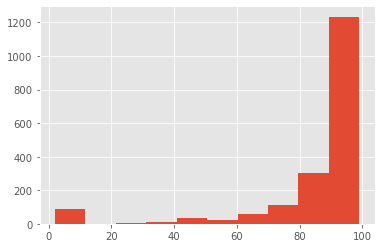

In [118]:
plt.hist(data.Diphtheria)

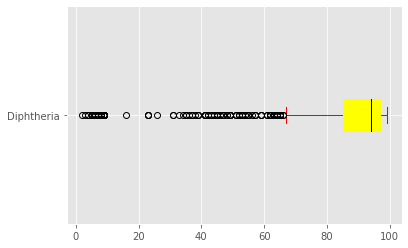

In [119]:
props=dict(boxes='yellow',whiskers='green',medians='black',caps='red')
data.Diphtheria.plot.box(patch_artist=True,vert=False,color=props)
plt.show()

In [120]:
iqr=data.Diphtheria.describe()['75%']-data.Diphtheria.describe()['25%']
iqr

12.0

In [121]:
ll=data.Diphtheria.describe()['25%']-1.5*iqr
ll

67.0

In [122]:
ll_len = len(data.Diphtheria[data.Diphtheria>ll])
ll_len

1665

In [123]:
ll_percentage =ll_len/len(data)

In [124]:
ll_percentage

0.8842272968667021

In [125]:
data['Diphtheria']=data["Diphtheria"].fillna(data["Diphtheria"].median())

In [126]:
data['HIV/AIDS'].value_counts()

0.1     1255
0.2       97
0.3       84
0.4       60
0.5       29
        ... 
5.2        1
22.8       1
6.6        1
12.2       1
19.2       1
Name: HIV/AIDS, Length: 101, dtype: int64

(array([1.813e+03, 4.500e+01, 1.500e+01, 2.000e+00, 3.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 3.000e+00]),
 array([ 0.1 ,  5.15, 10.2 , 15.25, 20.3 , 25.35, 30.4 , 35.45, 40.5 ,
        45.55, 50.6 ]),
 <BarContainer object of 10 artists>)

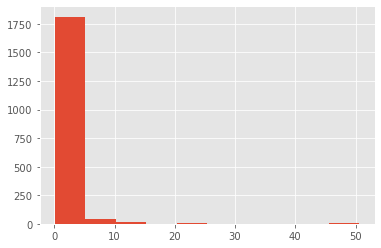

In [127]:
plt.hist(data['HIV/AIDS'])

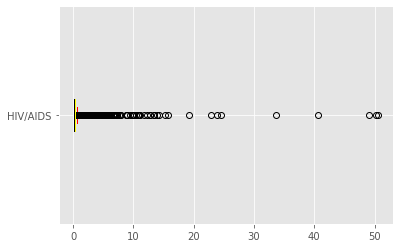

In [128]:
props=dict(boxes='yellow',whiskers='green',medians='black',caps='red')
data['HIV/AIDS'].plot.box(patch_artist=True,vert=False,color=props)
plt.show()

In [129]:
iqr=data['HIV/AIDS'].describe()['75%']-data['HIV/AIDS'].describe()['25%']
iqr

0.19999999999999998

In [130]:
ul=data['HIV/AIDS'].describe()['25%']+1.5*iqr
ul

0.4

In [131]:
data.GDP.value_counts()

4159.865200     1
843.894470      1
359.992184      1
1377.821400     1
3472.379770     1
               ..
7318.742449     1
644.525556      1
7946.944346     1
12724.393770    1
18.253210       1
Name: GDP, Length: 1556, dtype: int64

(array([1.331e+03, 1.500e+02, 5.000e+01, 9.000e+00, 3.000e+00, 4.000e+00,
        4.000e+00, 1.000e+00, 3.000e+00, 1.000e+00]),
 array([5.66872640e+00, 6.63975412e+03, 1.32738395e+04, 1.99079249e+04,
        2.65420103e+04, 3.31760957e+04, 3.98101811e+04, 4.64442665e+04,
        5.30783519e+04, 5.97124373e+04, 6.63465227e+04]),
 <BarContainer object of 10 artists>)

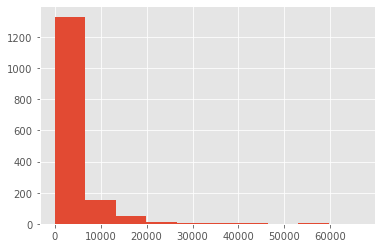

In [132]:
plt.hist(data.GDP)

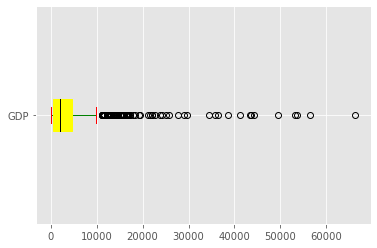

In [133]:
props=dict(boxes='yellow',whiskers='green',medians='black',caps='red')
data.GDP.plot.box(patch_artist=True,vert=False,color=props)
plt.show()

In [134]:
iqr=data.GDP.describe()['75%']-data.GDP.describe()['25%']
iqr

3984.917386425

In [135]:
data['GDP']=data["GDP"].fillna(data["GDP"].median())

In [136]:
data.Population.value_counts()

444.0        3
718239.0     2
6876345.0    1
46533.0      1
8121423.0    1
            ..
31372.0      1
333897.0     1
241871.0     1
9474511.0    1
61724.0      1
Name: Population, Length: 1406, dtype: int64

(array([1266.,   68.,   41.,   10.,   12.,    6.,    0.,    0.,    0.,
           6.]),
 array([3.40000000e+01, 1.46596863e+07, 2.93193386e+07, 4.39789909e+07,
        5.86386432e+07, 7.32982955e+07, 8.79579478e+07, 1.02617600e+08,
        1.17277252e+08, 1.31936905e+08, 1.46596557e+08]),
 <BarContainer object of 10 artists>)

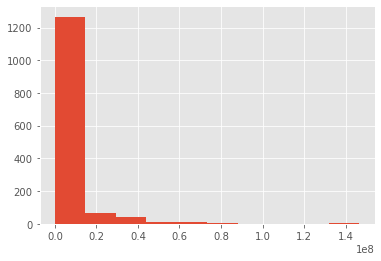

In [137]:
plt.hist(data.Population)

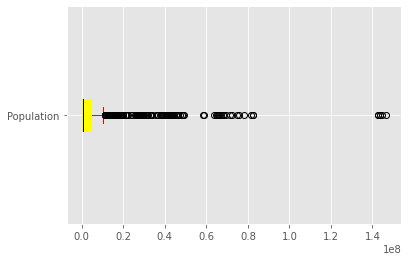

In [138]:
props=dict(boxes='yellow',whiskers='green',medians='black',caps='red')
data.Population.plot.box(patch_artist=True,vert=False,color=props)
plt.show()

In [139]:
data['Population']=data["Population"].fillna(data["Population"].median())

In [140]:
data.Income_Comp_Of_Resources.value_counts()

0.000    103
0.700     14
0.739     12
0.737     11
0.797     11
        ... 
0.336      1
0.323      1
0.864      1
0.938      1
0.831      1
Name: Income_Comp_Of_Resources, Length: 505, dtype: int64

(array([103.,   0.,   0.,  26., 139., 152., 306., 585., 345., 131.]),
 array([0.    , 0.0948, 0.1896, 0.2844, 0.3792, 0.474 , 0.5688, 0.6636,
        0.7584, 0.8532, 0.948 ]),
 <BarContainer object of 10 artists>)

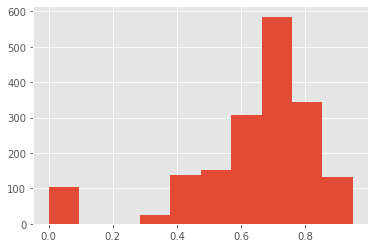

In [141]:
plt.hist(data.Income_Comp_Of_Resources )

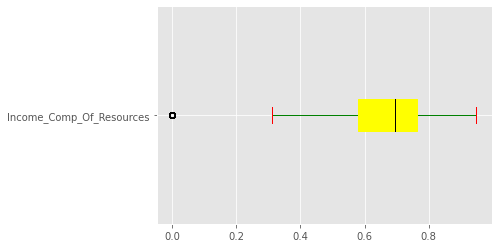

In [142]:
props=dict(boxes='yellow',whiskers='green',medians='black',caps='red')
data.Income_Comp_Of_Resources.plot.box(patch_artist=True,vert=False,color=props)
plt.show()

In [143]:
iqr=data.Income_Comp_Of_Resources.describe()['75%']-data.Income_Comp_Of_Resources.describe()['25%']
iqr

0.18400000000000005

In [144]:
ll=data.Income_Comp_Of_Resources.describe()['25%']-1.5*iqr

In [145]:
ll

0.3039999999999999

In [146]:
data.shape

(1883, 20)

In [147]:
data = data[data['Income_Comp_Of_Resources']>=ll]

In [148]:
data.shape

(1684, 20)

In [149]:
data['Income_Comp_Of_Resources']=data["Income_Comp_Of_Resources"].fillna(data["Income_Comp_Of_Resources"].median())

In [150]:
data.corr()

,Year,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,BMI,Under_Five_Deaths,Polio,Tot_Exp,Diphtheria,HIV/AIDS,GDP,Population,thinness_1to19_years,thinness_5to9_years,Income_Comp_Of_Resources,Schooling
Year,1.000000,0.143674,-0.053828,-0.038204,-0.107329,0.000347,0.058310,-0.035721,0.076603,0.080483,0.090489,-0.082066,0.188835,0.013354,0.006997,0.012048,0.131331,0.180365
Life_Expectancy,0.143674,1.000000,-0.588032,-0.349534,0.296644,0.297830,0.460176,-0.405732,0.375870,0.195241,0.394162,-0.511371,0.287097,0.077610,-0.398761,-0.398020,0.853677,0.742244
Adult_Mortality,-0.053828,-0.588032,1.000000,0.205441,-0.078316,-0.181383,-0.322488,0.237511,-0.198079,-0.115059,-0.212922,0.213146,-0.176555,-0.022622,0.251029,0.248986,-0.503054,-0.424622
Infant_Deaths,-0.038204,-0.349534,0.205441,1.000000,-0.278317,-0.205905,-0.235516,0.990958,-0.138673,-0.091068,-0.140131,0.062075,-0.188965,0.292012,0.285922,0.292881,-0.426395,-0.357775
Alcohol,-0.107329,0.296644,-0.078316,-0.278317,1.000000,0.221721,0.227020,-0.281225,0.109217,0.227950,0.125759,-0.018374,0.110884,0.103598,-0.359850,-0.354158,0.466940,0.465368
Percentage_Exp,0.000347,0.297830,-0.181383,-0.205905,0.221721,1.000000,0.177858,-0.220852,0.113523,0.093613,0.118283,-0.062060,0.393336,0.064947,-0.150015,-0.154702,0.358398,0.326329
BMI,0.058310,0.460176,-0.322488,-0.235516,0.227020,0.177858,1.000000,-0.272814,0.163153,0.186001,0.162051,-0.231107,0.185147,0.077208,-0.530275,-0.536044,0.513926,0.466020
Under_Five_Deaths,-0.035721,-0.405732,0.237511,0.990958,-0.281225,-0.220852,-0.272814,1.000000,-0.167957,-0.097041,-0.170474,0.094165,-0.198629,0.261011,0.301049,0.307426,-0.480188,-0.397317
Polio,0.076603,0.375870,-0.198079,-0.138673,0.109217,0.113523,0.163153,-0.167957,1.000000,0.120480,0.669367,-0.190275,0.140931,0.073667,-0.080339,-0.079741,0.361904,0.328075
Tot_Exp,0.080483,0.195241,-0.115059,-0.091068,0.227950,0.093613,0.186001,-0.097041,0.120480,1.000000,0.131196,-0.034420,-0.017701,-0.010209,-0.286487,-0.285370,0.133046,0.187713


In [151]:
data.drop(['Year','Adult_Mortality','Infant_Deaths','HIV/AIDS','Under_Five_Deaths','Alcohol'],axis=1,inplace=True)

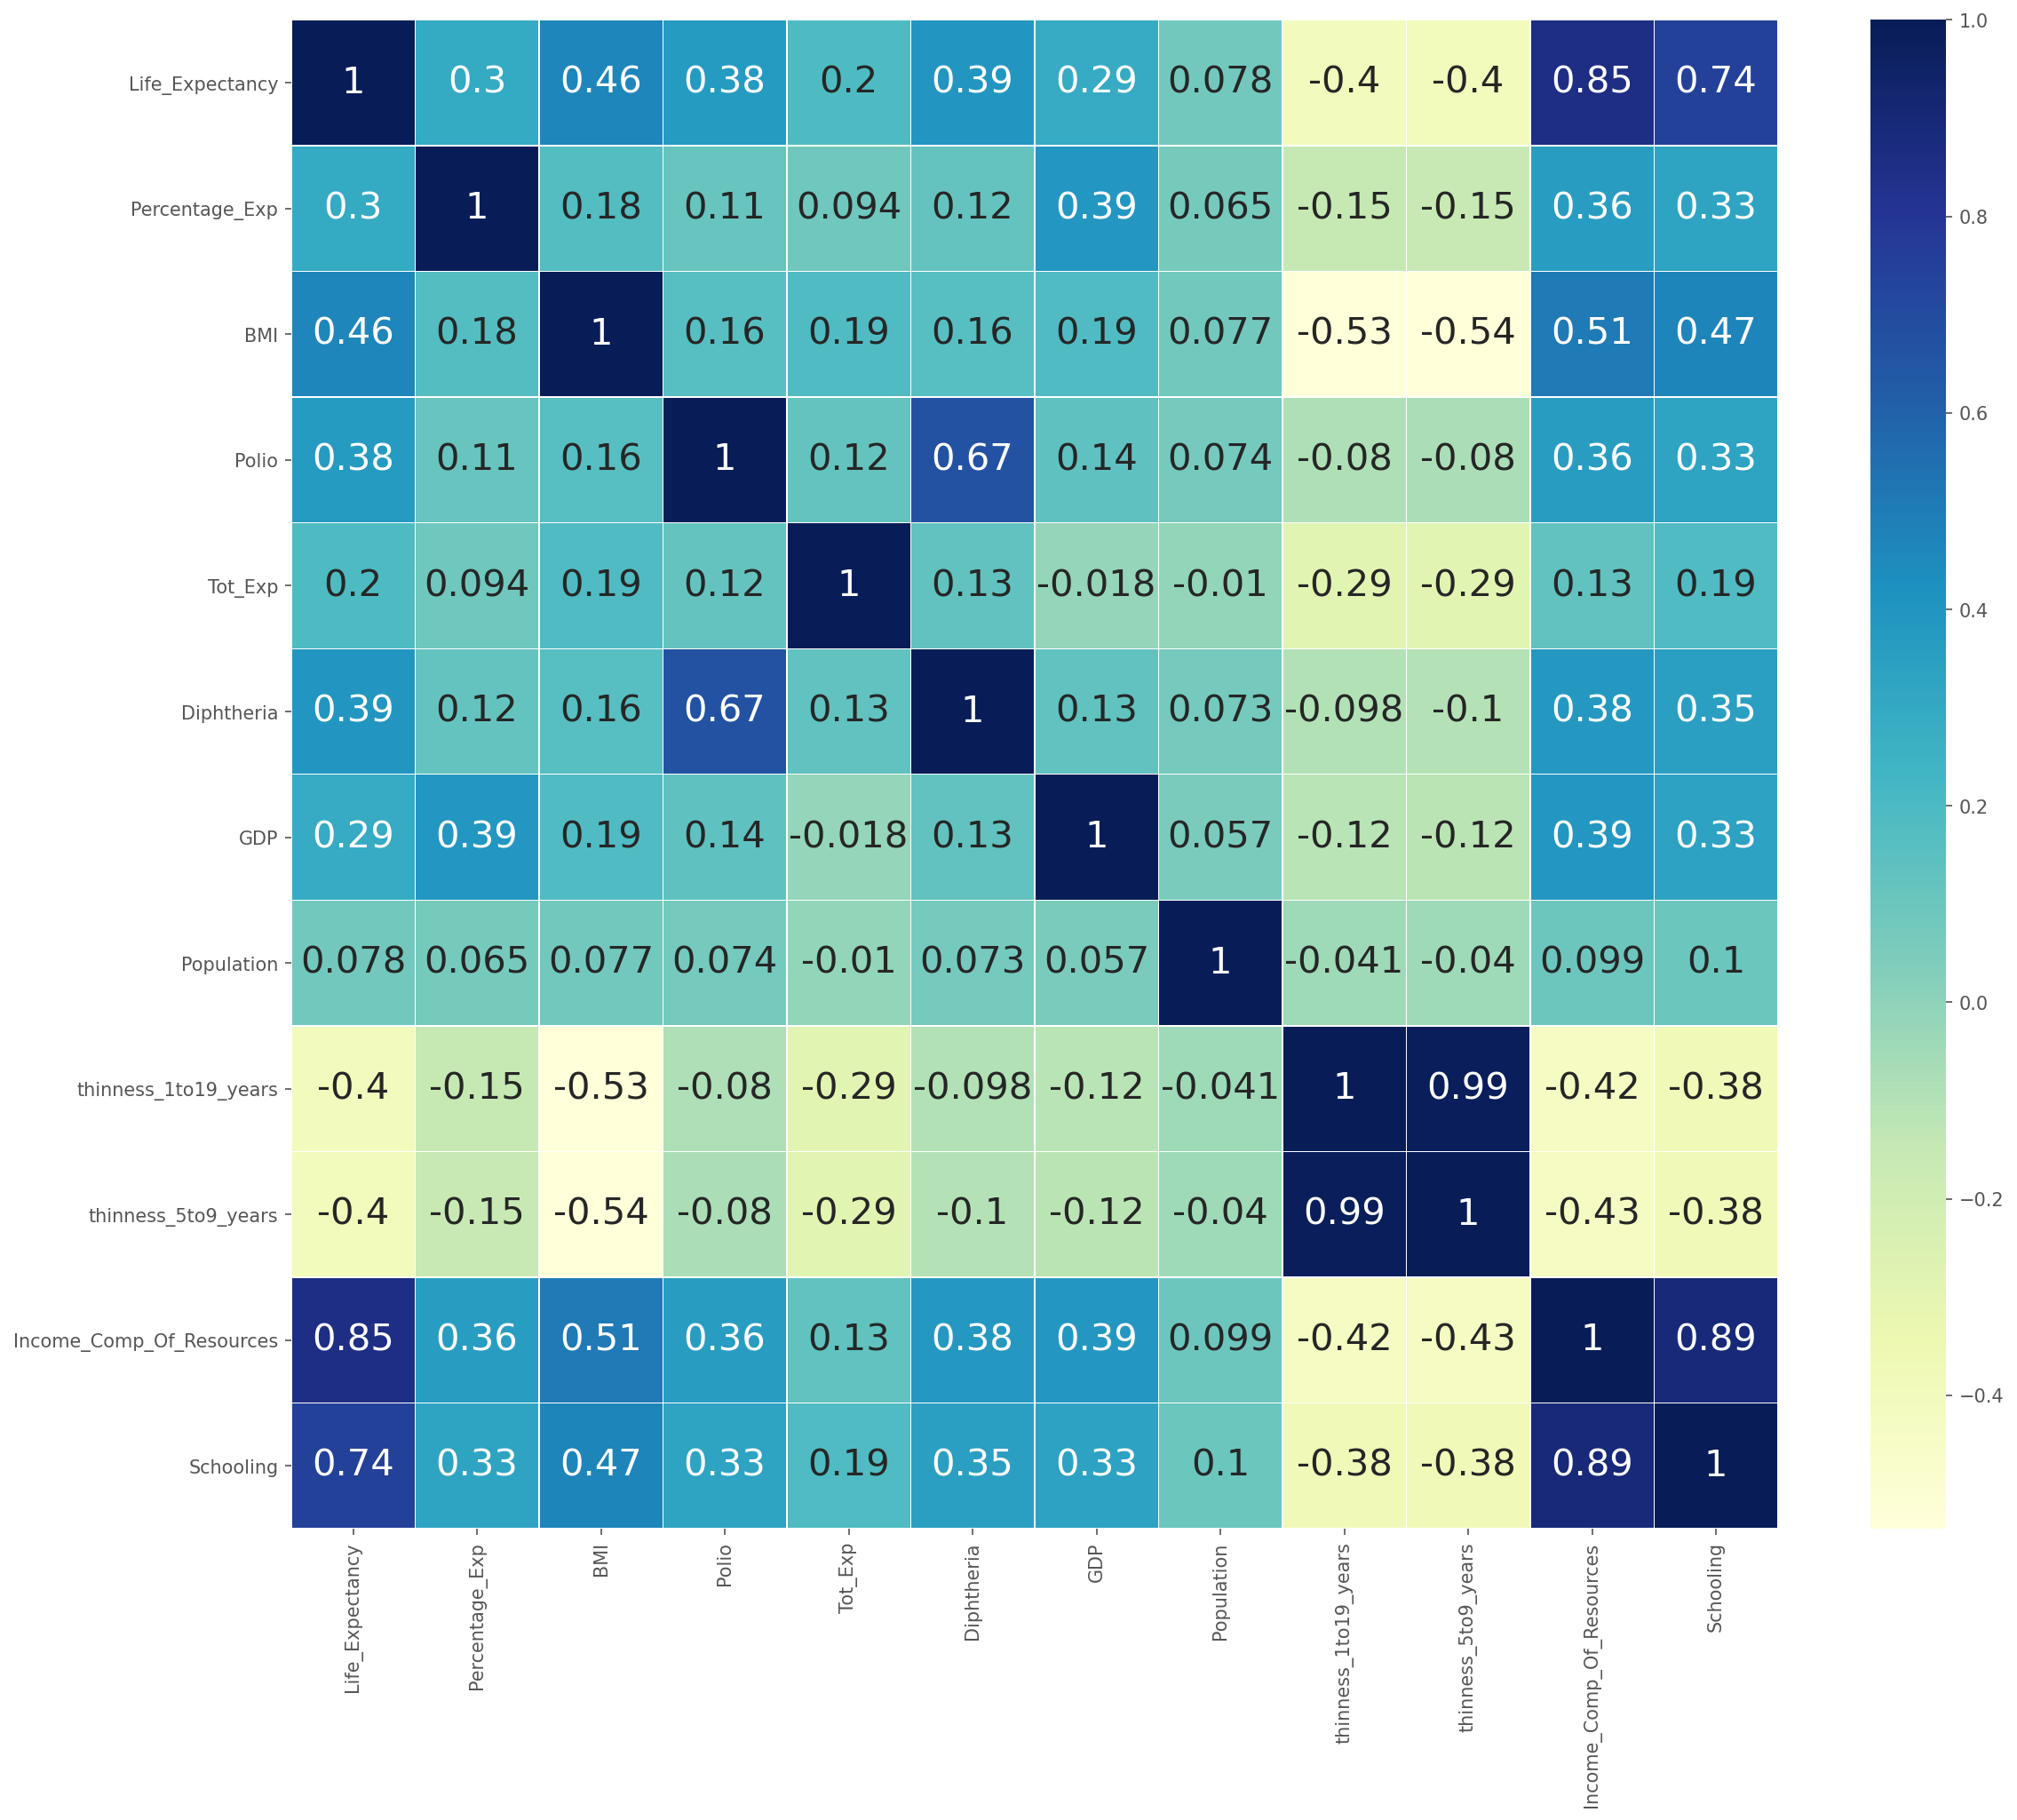

In [152]:
plt.figure(figsize=(18,15),dpi=150)
sns.heatmap(data.corr(),annot=True,cmap='YlGnBu',lw=0.2,annot_kws={'size':20})
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [153]:
data.drop(['thinness_1to19_years','thinness_5to9_years'],axis=1,inplace=True)

In [154]:
dummy_data=pd.get_dummies(data=data,drop_first=True)

In [155]:
data.drop(['Polio'],axis=1,inplace=True)

In [156]:
data.drop(['Schooling'],axis=1,inplace=True)

In [157]:
data.shape

(1684, 10)

In [158]:
x=dummy_data.drop('Life_Expectancy',axis=1)
y=dummy_data['Life_Expectancy']

In [159]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [160]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30, random_state=25)

In [161]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1178, 150)
(506, 150)
(1178,)
(506,)


In [162]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm

In [163]:
model=sm.OLS(y_train,x_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     139.6
Date:                Fri, 22 Oct 2021   Prob (F-statistic):               0.00
Time:                        11:15:43   Log-Likelihood:                -2158.2
No. Observations:                1178   AIC:                             4614.
Df Residuals:                    1029   BIC:                             5370.
Df Model:                         148                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

In [164]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [165]:
model.score(x_train, y_train)

0.9525434721294612

In [168]:
model.score(x_test,y_test)

0.9298491476835784

In [166]:
y_hat = model.predict(x_train)

In [167]:
y_hat

array([76.20197378, 74.51561059, 66.62797387, ..., 54.82305293,
       72.27030848, 72.82820118])